In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model evaluation metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import confusion_matrix,classification_report

# Load Data

In [2]:
heart_df = pd.read_csv("13.1 heart-disease.csv")
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Description is based on kaggle

#### cp: chest pain type
3: asymptomatic-> chest pain not showing sign of disease

Value 1: atypical angina -> chest pain not related to heart

Value 2: non-anginal pain -> non heart related

Value 0: typical angina -> chest pain which resulted due to decrease in blood supply to heart

#### trestbps : 
resting blood pressure (in mm Hg on admission to the hospital)

#### chol :
serum cholestoral in mg/dl

#### fbs (fasting blood sugar > 120 mg/dl) 
1 = true
0 = false

#### restecg: resting electrocardiographic results
Value 0: showing probable or definite left ventricular hypertrophy by Estes' criteria
Value 1: normal
Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

#### slope: the slope of the peak exercise ST segment
0: downsloping
1: flat
2: upsloping

#### thal: 
1 = fixed defect
2 = normal
7 = reversable defect

#### sex
1 = male
0 = female

#### thalach
maximum heart rate achieved

#### ca
number of major vessels (0-3) colored by flourosopy


#### target (maybe THE most important feature):
0 = disease,
1 = no disease

#### A few more things to consider:
data #93, 139, 164, 165 and 252 have ca=4 which is incorrect. In the original Cleveland dataset they are NaNs (so they should be removed)
data #49 and 282 have thal = 0, also incorrect. They are also NaNs in the original dataset.



# EDA

In [3]:
#understanding the data
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 14 columns):
age         301 non-null int64
sex         301 non-null int64
cp          301 non-null int64
trestbps    301 non-null int64
chol        301 non-null int64
fbs         301 non-null int64
restecg     301 non-null int64
thalach     301 non-null int64
exang       301 non-null int64
oldpeak     301 non-null float64
slope       301 non-null int64
ca          301 non-null int64
thal        301 non-null int64
target      301 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.0 KB


In [4]:
#lets see are there any missing values
heart_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
#based on above kaggle description mentioned(few things to remember)
print(heart_df[heart_df["ca"] == 4])
print(heart_df[heart_df["thal"]==0])
heart_df.drop(index=[92,158,163,164,251],inplace = True)
heart_df.drop(index=[48,281],inplace = True)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
92    52    1   2       138   223    0        1      169      0      0.0   
158   58    1   1       125   220    0        1      144      0      0.4   
163   38    1   2       138   175    0        1      173      0      0.0   
164   38    1   2       138   175    0        1      173      0      0.0   
251   43    1   0       132   247    1        0      143      1      0.1   

     slope  ca  thal  target  
92       2   4     2       1  
158      1   4     3       1  
163      2   4     2       1  
164      2   4     2       1  
251      1   4     3       0  
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
48    53    0   2       128   216    0        0      115      0      0.0   
281   52    1   0       128   204    1        1      156      1      1.0   

     slope  ca  thal  target  
48       2   0     0       1  
281      1   0     0       0  


# Based on the sex,lets see the target 

In [6]:
heart_df["sex"].value_counts()

1    200
0     94
Name: sex, dtype: int64

In [7]:
pd.crosstab(heart_df["sex"],heart_df["target"]) #confusion matrix

target,0,1
sex,,
0,23,71
1,111,89


In [8]:
heart_df.groupby("sex").mean()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,,,,,,,,,,,,,
0,55.691489,1.031915,133.170213,262.053191,0.12766,0.585106,151.265957,0.234043,0.894681,1.425532,0.553191,2.148936,0.755319
1,53.950000,0.930000,130.885000,240.790000,0.15500,0.495000,148.810000,0.370000,1.141000,1.385000,0.735000,2.410000,0.445000


#### from the above two result
    there are nearly 76% of females having heart disease(71/94 *100%)
    
    and there are nearly 45% of males having heart disease(89/200 *100%)
    
    and there are (71+89)/294(len(df)) *100% = 54 % of people have heart disease from the given data

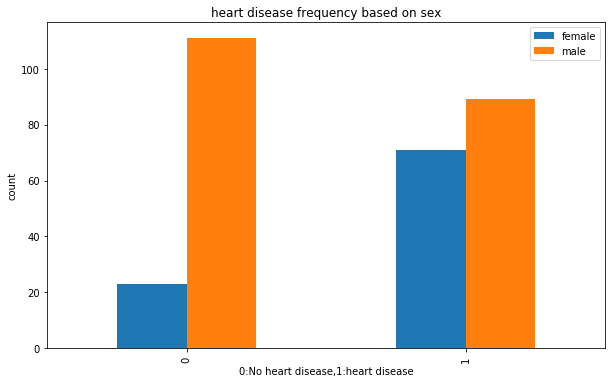

In [9]:
#lets visualize by plotting the same explaination
fig,ax = plt.subplots(figsize=(10,6))
pd.crosstab(heart_df["target"],heart_df["sex"]).plot(kind="bar",ax=ax);
ax.set(
title="heart disease frequency based on sex",
xlabel="0:No heart disease,1:heart disease",
ylabel="count")
ax.legend(["female","male"]);

### age vs target

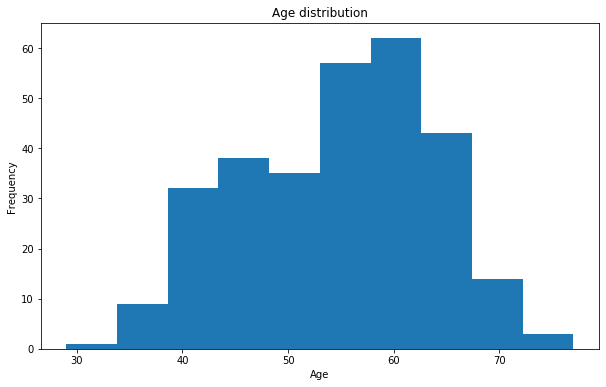

In [10]:
#lets see the ditribution of age
fig,ax = plt.subplots(figsize = (10,6))
heart_df.age.plot(kind="hist",ax = ax);
ax.set(
title="Age distribution",
xlabel = "Age");


from above distribution we can see that 55-65 years age group are more in the given data

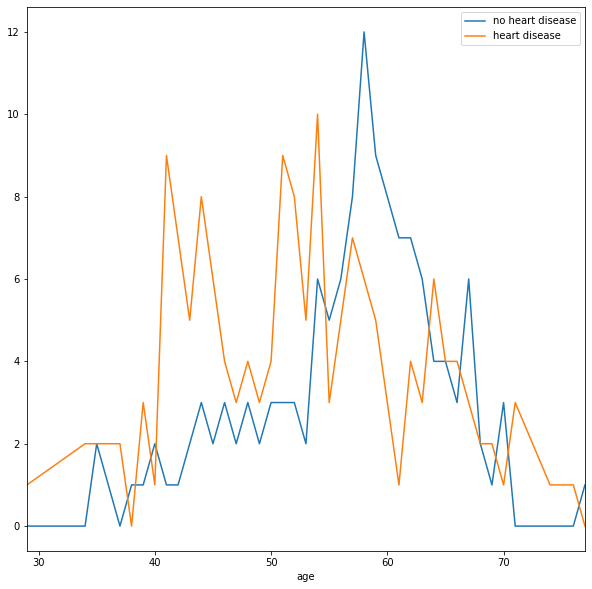

In [11]:
fig,ax=plt.subplots(figsize=(10,10))
pd.crosstab(heart_df["age"],heart_df["target"]).plot(kind="line",ax=ax);
ax.legend(["no heart disease","heart disease"]);

### from the above graph we can see that 
age group 40-55 have high chance of heart disease

age group 55-65 have low chance of heart disease

## Max heart rate achieved(thalac) with target = 1 vs age with target = 1(having heart disease)

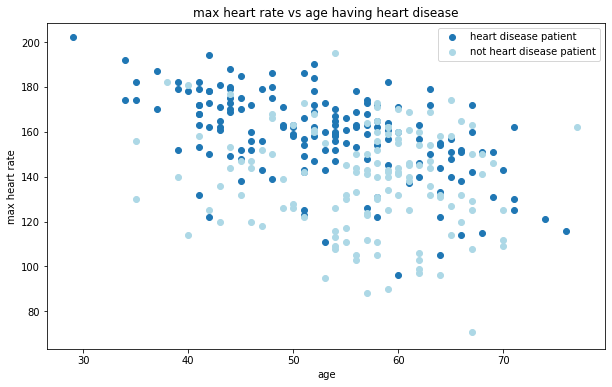

In [12]:
fig,ax = plt.subplots(figsize = (10,6))
ax.scatter(heart_df.age[heart_df.target ==1],heart_df.thalach[heart_df.target == 1]);

#lets now also plot for the negative target
ax.scatter(heart_df.age[heart_df.target == 0],heart_df.thalach[heart_df.target == 0],c ="lightblue");

ax.set(
title = "max heart rate vs age having heart disease",
xlabel ="age",
ylabel = "max heart rate");

ax.legend(['heart disease patient','not heart disease patient']);

Less year people having high heart rate suffers from heart disease.

As people gets older,people's ko heart rate decreases for those having heart disease

### Max heart rate with sex

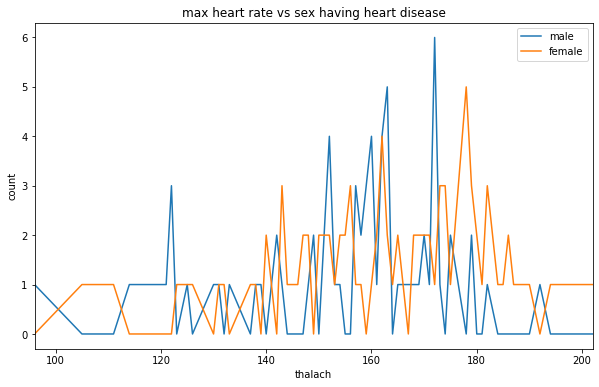

In [13]:
fig,ax = plt.subplots(figsize=(10,6))
pd.crosstab(heart_df.thalach[heart_df.target==1],heart_df["sex"][heart_df.target==1]).plot(kind="line", ax = ax);
ax.legend(["male","female"]);
ax.set(title="max heart rate vs sex having heart disease",
      ylabel ="count");


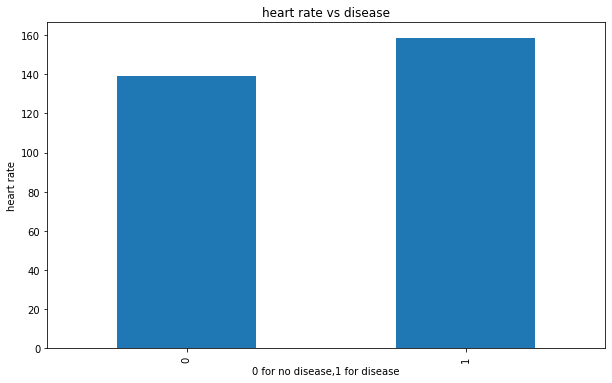

In [14]:
fig,ax = plt.subplots(figsize =(10,6))
heart_df["thalach"].groupby(heart_df["target"]).mean().plot(kind="bar",ax = ax);
ax.set(title="heart rate vs disease",
      xlabel="0 for no disease,1 for disease",
      ylabel="heart rate");


Those people having 160 heart rate in average are suffering from heart diseases.

Normal people have heart rate of 138 in average
#### so people having greater than 150 max heart rate are most likely to suffer from the heart disease

Also,in male heart disease patient are likely to have max heart rate in the range 150-170

and in female heart disease patient are likely to have max heart rate in the range 160-180

### Heart disease with chest pain type

In [15]:
#cp: chest pain type
#3: asymptomatic-> chest pain not showing sign of disease
#Value 1: atypical angina -> chest pain not related to heart
#Value 2: non-anginal pain -> non heart related
#Value 0: typical angina -> chest pain which resulted due to decrease in blood supply to heart
heart_df["cp"].value_counts()

0    140
2     83
1     48
3     23
Name: cp, dtype: int64

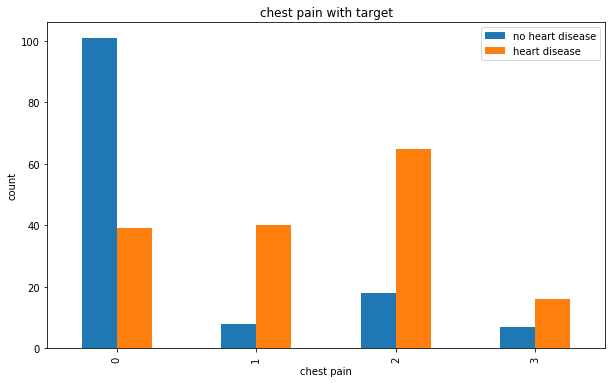

In [16]:
fig,ax = plt.subplots(figsize=(10,6))
pd.crosstab(heart_df["cp"],heart_df["target"]).plot(kind="bar",ax = ax)
ax.set(
title = "chest pain with target",
xlabel = "chest pain",
ylabel ="count")
ax.legend(["no heart disease","heart disease"]);


I cannot crack it. 

In [17]:
#lets see the corelation of every variable(final steps)
heart_df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.089521,-0.060680,0.288952,0.205023,0.133901,-0.112655,-0.397976,0.097813,0.200444,-0.160831,0.363830,0.063015,-0.224390
sex,-0.089521,1.000000,-0.045949,-0.060022,-0.192118,0.036084,-0.079896,-0.050067,0.135212,0.098455,-0.030566,0.090111,0.208084,-0.290586
cp,-0.060680,-0.045949,1.000000,0.044402,-0.075713,0.117329,0.042273,0.293869,-0.381503,-0.142077,0.103031,-0.225588,-0.159646,0.422452
trestbps,0.288952,-0.060022,0.044402,1.000000,0.127046,0.183515,-0.117932,-0.052256,0.071035,0.196836,-0.127318,0.102296,0.064134,-0.150197
chol,0.205023,-0.192118,-0.075713,0.127046,1.000000,0.010946,-0.137516,-0.012766,0.073424,0.042805,0.000229,0.122969,0.091844,-0.086684
fbs,0.133901,0.036084,0.117329,0.183515,0.010946,1.000000,-0.082789,-0.007824,-0.000838,0.005968,-0.048442,0.152367,-0.017122,-0.007757
restecg,-0.112655,-0.079896,0.042273,-0.117932,-0.137516,-0.082789,1.000000,0.038539,-0.072891,-0.059225,0.091125,-0.111599,-0.014210,0.132319
thalach,-0.397976,-0.050067,0.293869,-0.052256,-0.012766,-0.007824,0.038539,1.000000,-0.377656,-0.345339,0.390286,-0.269007,-0.104982,0.429216
exang,0.097813,0.135212,-0.381503,0.071035,0.073424,-0.000838,-0.072891,-0.377656,1.000000,0.286728,-0.248695,0.146618,0.218833,-0.425909
oldpeak,0.200444,0.098455,-0.142077,0.196836,0.042805,0.005968,-0.059225,-0.345339,0.286728,1.000000,-0.581136,0.294360,0.210370,-0.434070


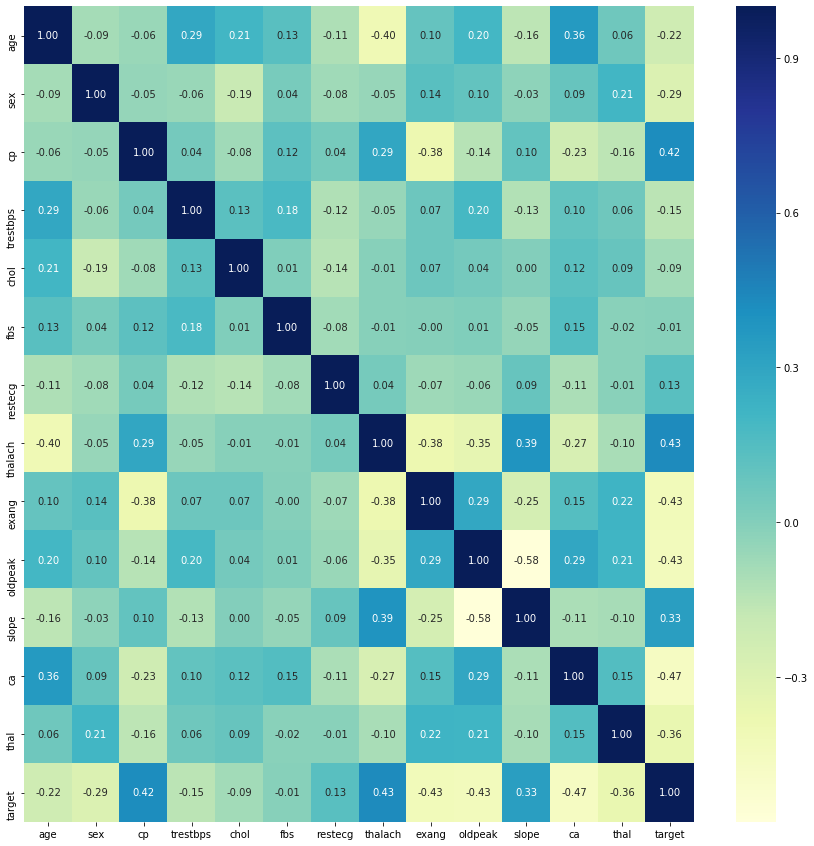

In [19]:
corr_matrix = heart_df.corr()
fig,ax = plt.subplots(figsize =(15,15))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 fmt=".2f",
                cmap ="YlGnBu")
bottom,top = ax.get_ylim()
ax.set_ylim(bottom + 0.5,top - 0.5);

In [20]:
heart_df.to_csv("heartdiseaseEDA.csv")